In [1]:
import numpy as np
import pandas as pd

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def point2pp(p, fd):
    #método via triângulos semelhantes
    return np.array([-fd*(p[0]/p[2]), -fd*(p[1]/p[2]), -fd])

def point2pp_v2(p, fd):
    #método via matriz de projeção
    PP_M = np.array([[1, 0, 0, 0],[0, 1, 0, 0],[0, 0, 1, 0],[0, 0, -1/fd, 0]])
    res = PP_M.dot(np.append(p, 1))
    return np.array([res[0]/res[3], res[1]/res[3], res[2]/res[3]])

In [3]:
#4)

DF = 0.05

#Eixos referência
A_abs =  np.array([10, 6, 4])
P_abs =  np.array([7, 2, 2])

#Eixos da camêra
A_cam = np.array([3, 2, 10])
P_cam = np.array([-1, 0, 7])

#4.1)
print(point2pp(A_cam, DF))

#4.2)
print(point2pp(P_cam, DF))



[-0.015 -0.01  -0.05 ]
[ 0.00714286 -0.         -0.05      ]


In [4]:
#4.3)
print(point2pp_v2(A_cam, DF))
print(point2pp_v2(P_cam, DF))

[-0.015 -0.01  -0.05 ]
[ 0.00714286 -0.         -0.05      ]


         N        Res    Pixels       Bits
0       16      16*16       256       6144
1       17      17*17       289       6936
2       18      18*18       324       7776
3       19      19*19       361       8664
4       20      20*20       400       9600
...    ...        ...       ...        ...
4076  4092  4092*4092  16744464  401867136
4077  4093  4093*4093  16752649  402063576
4078  4094  4094*4094  16760836  402260064
4079  4095  4095*4095  16769025  402456600
4080  4096  4096*4096  16777216  402653184

[4081 rows x 4 columns]


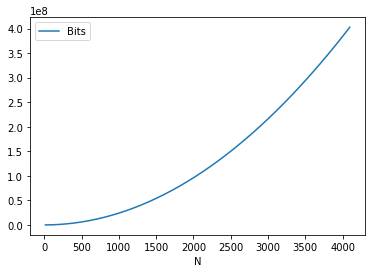

In [5]:
#5)

#5.1)
bit_pixel = 24

data = []

for N in range(16, 4097):
    data.append([N, str(N)+"*"+str(N), N*N, N*N*bit_pixel])
    
table = pd.DataFrame(data, columns=["N", "Res", "Pixels", "Bits"])
print(table)

table.plot(x ='N', y='Bits', kind = 'line')
plt.show()

          N        Res    Pixels   K       Bits
0        16      16*16       256   1        256
1        16      16*16       256   2        512
2        16      16*16       256   3        768
3        16      16*16       256   4       1024
4        16      16*16       256   5       1280
...     ...        ...       ...  ..        ...
97939  4096  4096*4096  16777216  20  335544320
97940  4096  4096*4096  16777216  21  352321536
97941  4096  4096*4096  16777216  22  369098752
97942  4096  4096*4096  16777216  23  385875968
97943  4096  4096*4096  16777216  24  402653184

[97944 rows x 5 columns]


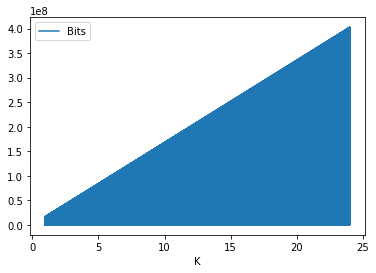

In [6]:
#5.2)

data = []

for N in range(16, 4097):
    for K in range(1, 25):
        data.append([N, str(N)+"*"+str(N), N*N, K, N*N*K])
        
table = pd.DataFrame(data, columns=["N", "Res", "Pixels", "K", "Bits"])
print(table)

table.plot(x ='K', y='Bits', kind = 'line')
plt.show()

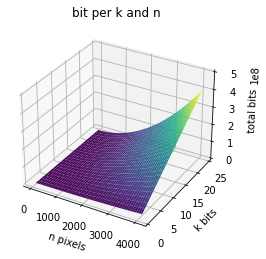

In [7]:
def f(n, k):
    return (n*n*k)

k = np.linspace(1, 24, 24)
n = np.linspace(16, 4096, 4081)

X, Y = np.meshgrid(n, k)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,
                cmap='viridis', edgecolor='none')
ax.set_title('bit per k and n');
ax.set_xlabel('n pixels')
ax.set_ylabel('k bits')
ax.set_zlabel('total bits');
ax.set_zlim3d(0, 500000000)
plt.show();

In [8]:
#6)

#                0 | 0 0 0 0 | 0 0 1 1 | 0
#                1 | 0 0 1 0 | 0 1 0 0 | 1
#                1 | 0 0 1 0 | 1 1 0 0 | 0
#                0 | 0 1 1 1 | 0 0 0 0 | 0
#                  --------------------
#                0 0   1 1 1   0 0 1 1   1

def check_4adj(p_x, p_y, q_x, q_y):
    res = False
    if ((p_x == q_x) and (p_y == q_y-1 or p_y == q_y+1)) or ((p_y == q_y) and (p_x == q_x-1 or p_x == q_x+1)):
        res = True
        if ((p_x != q_x) and (p_y != q_y)):
            res = False
    return res

def check_diagadj(p_x, p_y, q_x, q_y):
    res = False
    if ((p_x != q_x) and (p_y != q_y)):
        res = True
        if ((p_x == q_x) and (p_y == q_y-1 or p_y == q_y+1)) or ((p_y == q_y) and (p_x == q_x-1 or p_x == q_x+1)):
            res = False
    return res

def check_8adj(p_x, p_y, q_x, q_y):
    if ((p_x != q_x) and (p_y != q_y)):
        return [True, "d"]
    if ((p_x == q_x) and (p_y == q_y-1 or p_y == q_y+1)) or ((p_y == q_y) and (p_x == q_x-1 or p_x == q_x+1)):
        return [True, "4"]
    return "error"

def check_madj(arr, v, p_x, p_y, q_x, q_y):
    if ((p_x != q_x) and (p_y != q_y)):
        dif_x = q_x - p_x
        dif_y = q_y - p_y
        if (arr[p_x+dif_x][p_y] != v) and (arr[p_x][p_y+dif_y] != v):
            return [True, "d"]
    if ((p_x == q_x) and (p_y == q_y-1 or p_y == q_y+1)) or ((p_y == q_y) and (p_x == q_x-1 or p_x == q_x+1)):
        return [True, "4"]
    return [False, "8"]
    

def check_adj(arr, v):
    big = np.full((arr.shape[0]+2, arr.shape[1]+2), v+1)
    big[1:1+arr.shape[0], 1:1+arr.shape[1]] = arr
    for p_x in range(1,big.shape[1]-1):
        for p_y in range(1,big.shape[0]-1):
            if (big[p_x][p_y] == v):
                p_4adj = True
                p_diagadj = True
                p_8_v2_adj = True
                p_c8adj = np.array([0, 0])
                p_cmadj = np.array([0, 0])
                for xdif in range(-1, 2):
                    for ydif in range(-1, 2):
                        if not (xdif == 0 and ydif == 0):
                            q_x = p_x + xdif
                            q_y = p_y + ydif
                            if (big[q_x][q_y] == v):
                                if check_4adj(p_x, p_y, q_x, q_y) == False:
                                    p_4adj = False
                                if check_diagadj(p_x, p_y, q_x, q_y) == False:
                                    p_diagadj = False
                                if check_8adj(p_x, p_y, q_x, q_y) == [True, "d"]:
                                    p_c8adj[0] = p_c8adj[0] + 1
                                elif check_8adj(p_x, p_y, q_x, q_y) == [True, "4"]:
                                    p_c8adj[1] = p_c8adj[1] + 1
                                if check_madj(big, v, p_x, p_y, q_x, q_y) == [True, "d"]:
                                    p_cmadj[0] = p_cmadj[0] + 1
                                elif check_madj(big, v, p_x, p_y, q_x, q_y) == [True, "4"]:
                                    p_cmadj[1] = p_cmadj[1] + 1
                                elif check_madj(big, v, p_x, p_y, q_x, q_y) == [False, "8"]:
                                    p_8_v2_adj = False
                p_8adj = False
                p_madj = False
                if (p_cmadj[0] >= 1 and p_cmadj[1] >= 1 and p_8_v2_adj != False):
                    p_madj = True
                    print("m-adj: ", p_x-1, p_y-1)
                elif (p_c8adj[0] >= 1 and p_c8adj[1] >= 1 and p_madj != True):
                    p_8adj = True
                    print("8-adj: ", p_x-1, p_y-1)
                elif (p_4adj == True):
                    print("4-adj: ", p_x-1, p_y-1)
                elif (p_diagadj):
                    print("d-adj: ", p_x-1, p_y-1)
            

V = 1
img = np.array([[0,0,0,0,0,0,0,1,1,0],
               [1,0,0,1,0,0,1,0,0,1],
               [1,0,0,1,0,1,1,0,0,0],
               [0,0,1,1,1,0,0,0,0,0],
               [0,0,1,1,1,0,0,1,1,1]])

s1 = img[:4,1:5]
s2 = img[:4,5:9]
print("S1:")
print(s1)
check_adj(s1, V)
print("----------------")
print("S2:")
print(s2)    
check_adj(s2, V)




S1:
[[0 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 1 1]]
4-adj:  1 2
8-adj:  2 2
8-adj:  3 1
4-adj:  3 2
8-adj:  3 3
----------------
S2:
[[0 0 1 1]
 [0 1 0 0]
 [1 1 0 0]
 [0 0 0 0]]
m-adj:  0 2
4-adj:  0 3
8-adj:  1 1
8-adj:  2 0
4-adj:  2 1


In [9]:
#6)
#6.1)
print("\n4-adjacencies:")
print("S1: ")
print("    (1, 2)")
print("    (3, 2)")
print("S2: ")
print("    (0, 3)")
print("    (2, 1)")
    
#6.2)
print("\n8-adjacencies:")
print("S1: ")
print("    (2, 2)")
print("    (3, 1)")
print("    (3, 3)")
print("S2: ")
print("    (1, 1)")
print("    (2, 0)")
    
#6.3)
print("\nM-adjacencies:")
print("S2: ")
print("    (0, 2)")


4-adjacencies:
S1: 
    (1, 2)
    (3, 2)
S2: 
    (0, 3)
    (2, 1)

8-adjacencies:
S1: 
    (2, 2)
    (3, 1)
    (3, 3)
S2: 
    (1, 1)
    (2, 0)

M-adjacencies:
S2: 
    (0, 2)
